## Implementación en OpenCV

1. **Deformación proyectiva** controlada: moveremos las esquinas de la imagen para crear una vista "trapezoidal".  
2. **Rectificación** de un cuadrilátero interno: seleccionar una región y llevarla a un rectángulo (simulando *bird's-eye*).  


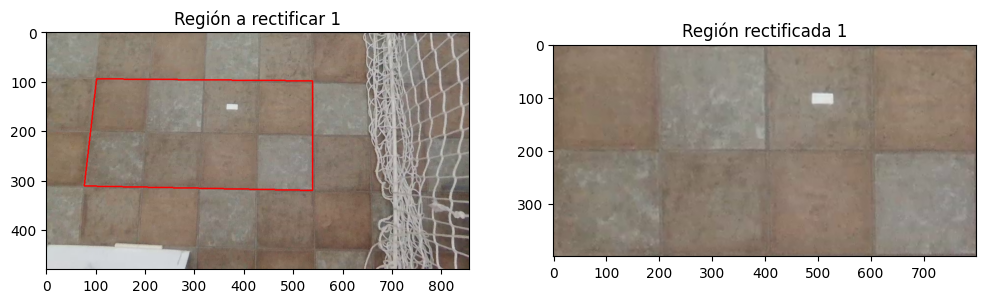

In [414]:
# ✅ Importar librerías y cargar imagen
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Ajuste para POSICION 1
# MISMA ruta que venimos usando (ajusta si cambió)
img_bgr_1 = cv2.imread(r"C:\Users\rrm21\Documents\Vision_en_Robotica\dron_images\p1.png")
if img_bgr_1 is None:
    raise FileNotFoundError("⚠️ No se pudo cargar la imagen. Verifica la ruta.")

img_rgb_1 = cv2.cvtColor(img_bgr_1, cv2.COLOR_BGR2RGB)
h, w = img_rgb_1.shape[:2]

#plt.imshow(img_rgb_1); plt.title("Original (RGB)"); plt.axis("off"); plt.show()

# Definir una región cuadrilátera interna (ajusta estos puntos si quieres otra zona)
# 4 squares x 2 squares
quad_src_1 = np.float32([ # [x,y]
    [int(0.12*w), int(0.20*h)], # Top Left corner 
    [int(0.63*w), int(0.21*h)], # Top Right corner
    [int(0.63*w), int(0.67*h)], # Bottom Right corner
    [int(0.09*w), int(0.65*h)], # Bottom Left corner
])

# Tamaño deseado del rectángulo de salida
out_W, out_H = 800, 400

# 4 squares x 3 squares
#quad_src_1 = np.float32([ # [x,y]
#    [int(0.12*w), int(0.20*h)], # Top Left corner 
#    [int(0.63*w), int(0.21*h)], # Top Right corner
#    [int(0.63*w), int(0.92*h)], # Bottom Right corner
#    [int(0.08*w), int(0.90*h)], # Bottom Left corner
#])
## Tamaño deseado del rectángulo de salida
#out_W, out_H = 800, 600


quad_dst = np.float32([
    [0, 0],
    [out_W-1, 0],
    [out_W-1, out_H-1],
    [0, out_H-1],
])

H_rect_1 = cv2.getPerspectiveTransform(quad_src_1, quad_dst)
rectified_1 = cv2.warpPerspective(img_rgb_1, H_rect_1, (out_W, out_H), flags=cv2.INTER_LINEAR,
                                borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))

# Visualización
fig1 = plt.figure(figsize=(12,5))
ax1 = fig1.add_subplot(1,2,1)
ax1.imshow(img_rgb_1); ax1.set_title("Región a rectificar 1"); ax1.axis("on")

# dibujar la región sobre la original
poly = quad_src_1.astype(int)
for i in range(4):
    p1 = tuple(poly[i])
    p2 = tuple(poly[(i+1)%4])
    cv2.line(img_rgb_1, p1, p2, (255,0,0), 2)  # ojo: img_rgb es RGB; dibujar con rojo puro
ax1.imshow(img_rgb_1)

ax2 = fig1.add_subplot(1,2,2)
ax2.imshow(rectified_1); ax2.set_title("Región rectificada 1"); ax2.axis("on")

plt.show()

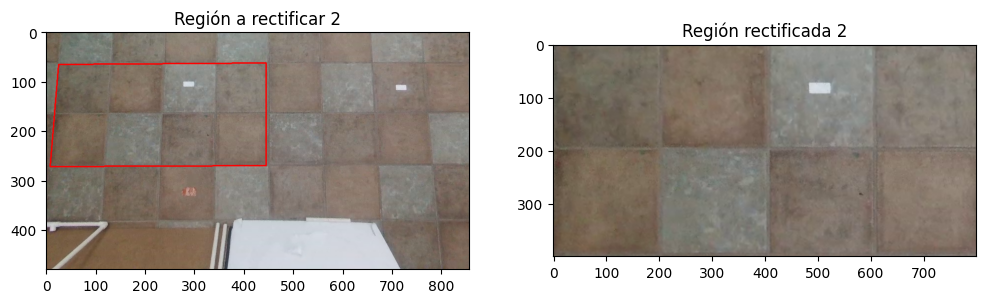

In [415]:
# Ajuste para POSICION 2
# MISMA ruta que venimos usando (ajusta si cambió)
img_bgr_2 = cv2.imread(r"C:\Users\rrm21\Documents\Vision_en_Robotica\dron_images\p2.png")
if img_bgr_2 is None:
    raise FileNotFoundError("⚠️ No se pudo cargar la imagen. Verifica la ruta.")

img_rgb_2 = cv2.cvtColor(img_bgr_2, cv2.COLOR_BGR2RGB)
h, w = img_rgb_2.shape[:2]

#plt.imshow(img_rgb_2); plt.title("Original (RGB)"); plt.axis("off"); plt.show()

# Definir una región cuadrilátera interna (ajusta estos puntos si quieres otra zona)
quad_src_2 = np.float32([ # [x,y]
    [int(0.03*w), int(0.14*h)], # Top Left corner 
    [int(0.52*w), int(0.135*h)], # Top Right corner
    [int(0.52*w), int(0.565*h)], # Bottom Right corner
    [int(0.01*w), int(0.57*h)], # Bottom Left corner
])

# Tamaño deseado del rectángulo de salida
out_W, out_H = 800, 400

quad_dst = np.float32([
    [0, 0],
    [out_W-1, 0],
    [out_W-1, out_H-1],
    [0, out_H-1],
])

H_rect_2 = cv2.getPerspectiveTransform(quad_src_2, quad_dst)
rectified_2 = cv2.warpPerspective(img_rgb_2, H_rect_2, (out_W, out_H), flags=cv2.INTER_LINEAR,
                                borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))

# Visualización
fig2 = plt.figure(figsize=(12,5))
ax1 = fig2.add_subplot(1,2,1)
ax1.imshow(img_rgb_2); ax1.set_title("Región a rectificar 2"); ax1.axis("on")

# dibujar la región sobre la original
poly = quad_src_2.astype(int)
for i in range(4):
    p1 = tuple(poly[i])
    p2 = tuple(poly[(i+1)%4])
    cv2.line(img_rgb_2, p1, p2, (255,0,0), 2)  # ojo: img_rgb es RGB; dibujar con rojo puro
ax1.imshow(img_rgb_2)

ax2 = fig2.add_subplot(1,2,2)
ax2.imshow(rectified_2); ax2.set_title("Región rectificada 2"); ax2.axis("on")

plt.show()

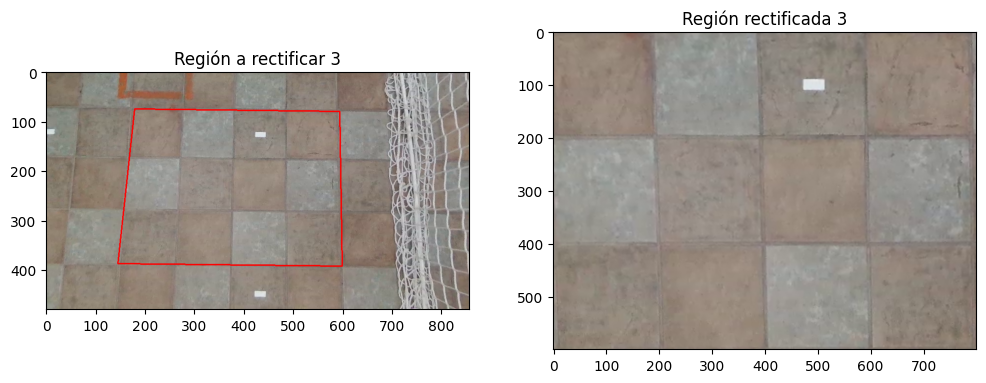

In [416]:
# Ajuste para POSICION 3
# MISMA ruta que venimos usando (ajusta si cambió)
img_bgr_3 = cv2.imread(r"C:\Users\rrm21\Documents\Vision_en_Robotica\dron_images\p3.png")
if img_bgr_3 is None:
    raise FileNotFoundError("⚠️ No se pudo cargar la imagen. Verifica la ruta.")

img_rgb_3 = cv2.cvtColor(img_bgr_3, cv2.COLOR_BGR2RGB)
h, w = img_rgb_3.shape[:2]

#plt.imshow(img_rgb_3); plt.title("Original (RGB)"); plt.axis("off"); plt.show()

# Definir una región cuadrilátera interna (ajusta estos puntos si quieres otra zona)
# 4 squares x 3 squares
quad_src_3 = np.float32([ # [x,y]
    [int(0.21*w), int(0.16*h)], # Top Left corner 
    [int(0.695*w), int(0.17*h)], # Top Right corner
    [int(0.7*w), int(0.82*h)], # Bottom Right corner
    [int(0.17*w), int(0.81*h)], # Bottom Left corner
])
# Tamaño deseado del rectángulo de salida
out_W, out_H = 800, 600


quad_dst = np.float32([
    [0, 0],
    [out_W-1, 0],
    [out_W-1, out_H-1],
    [0, out_H-1],
])

H_rect_3 = cv2.getPerspectiveTransform(quad_src_3, quad_dst)
rectified_3 = cv2.warpPerspective(img_rgb_3, H_rect_3, (out_W, out_H), flags=cv2.INTER_LINEAR,
                                borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))

# Visualización
fig2 = plt.figure(figsize=(12,5))
ax1 = fig2.add_subplot(1,2,1)
ax1.imshow(img_rgb_3); ax1.set_title("Región a rectificar 3"); ax1.axis("on")

# dibujar la región sobre la original
poly = quad_src_3.astype(int)
for i in range(4):
    p1 = tuple(poly[i])
    p2 = tuple(poly[(i+1)%4])
    cv2.line(img_rgb_3, p1, p2, (255,0,0), 2)  # ojo: img_rgb es RGB; dibujar con rojo puro
ax1.imshow(img_rgb_3)

ax2 = fig2.add_subplot(1,2,2)
ax2.imshow(rectified_3); ax2.set_title("Región rectificada 3"); ax2.axis("on")

plt.show()

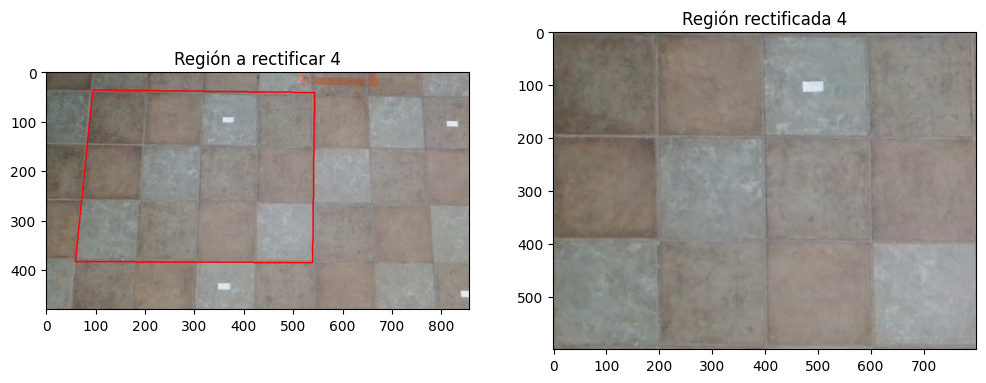

In [417]:
# Ajuste para POSICION 4
# MISMA ruta que venimos usando (ajusta si cambió)
img_bgr_4 = cv2.imread(r"C:\Users\rrm21\Documents\Vision_en_Robotica\dron_images\p4.png")
if img_bgr_4 is None:
    raise FileNotFoundError("⚠️ No se pudo cargar la imagen. Verifica la ruta.")

img_rgb_4 = cv2.cvtColor(img_bgr_4, cv2.COLOR_BGR2RGB)
h, w = img_rgb_4.shape[:2]

#plt.imshow(img_rgb_4); plt.title("Original (RGB)"); plt.axis("off"); plt.show()

# Definir una región cuadrilátera interna (ajusta estos puntos si quieres otra zona)
# 4 squares x 3 squares
quad_src_4 = np.float32([ # [x,y]
    [int(0.11*w), int(0.08*h)], # Top Left corner 
    [int(0.635*w), int(0.09*h)], # Top Right corner
    [int(0.63*w), int(0.805*h)], # Bottom Right corner
    [int(0.07*w), int(0.80*h)], # Bottom Left corner
])
# Tamaño deseado del rectángulo de salida
out_W, out_H = 800, 600


quad_dst = np.float32([
    [0, 0],
    [out_W-1, 0],
    [out_W-1, out_H-1],
    [0, out_H-1],
])

H_rect_4 = cv2.getPerspectiveTransform(quad_src_4, quad_dst)
rectified_4 = cv2.warpPerspective(img_rgb_4, H_rect_4, (out_W, out_H), flags=cv2.INTER_LINEAR,
                                borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))

# Visualización
fig2 = plt.figure(figsize=(12,5))
ax1 = fig2.add_subplot(1,2,1)
ax1.imshow(img_rgb_4); ax1.set_title("Región a rectificar 4"); ax1.axis("on")

# dibujar la región sobre la original
poly = quad_src_4.astype(int)
for i in range(4):
    p1 = tuple(poly[i])
    p2 = tuple(poly[(i+1)%4])
    cv2.line(img_rgb_4, p1, p2, (255,0,0), 2)  # ojo: img_rgb es RGB; dibujar con rojo puro
ax1.imshow(img_rgb_4)

ax2 = fig2.add_subplot(1,2,2)
ax2.imshow(rectified_4); ax2.set_title("Región rectificada 4"); ax2.axis("on")

plt.show()

Then we need to concatenate the 4 images to see the mosaic completely


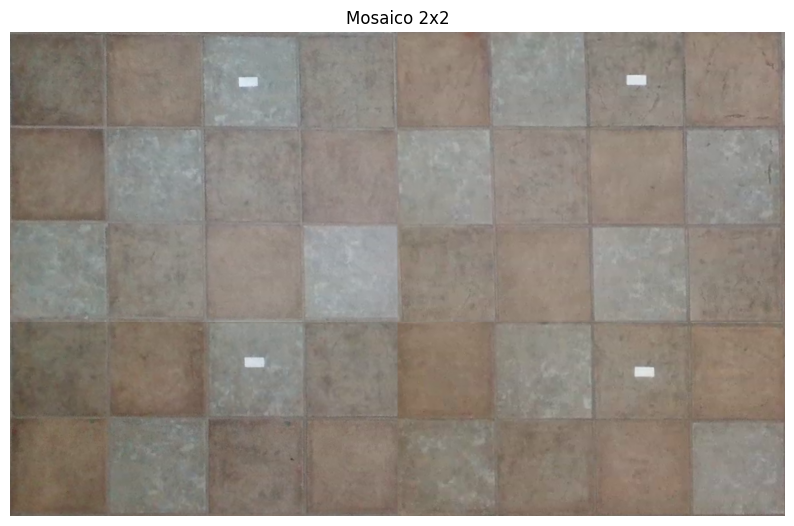

✅ Mosaico guardado en imágenes


In [418]:
# Repetir las imágenes en horizontal
row1 = cv2.hconcat([rectified_4, rectified_3])
row2 = cv2.hconcat([rectified_2, rectified_1])

# Concatenar las dos filas en vertical
mosaic = cv2.vconcat([row1, row2])

# Mostrar el resultado
plt.figure(figsize=(10,8))
plt.imshow(mosaic)
plt.title("Mosaico 2x2")
plt.axis("off")
plt.show()

if mosaic is not None:
    mosaic_bgr = cv2.cvtColor(mosaic, cv2.COLOR_RGB2BGR) # Convertir de nuevo a BGR antes de guardar 
    cv2.imwrite(r"C:\Users\rrm21\Documents\Vision_en_Robotica\dron_images\mosaico.png", mosaic_bgr)
    print("✅ Mosaico guardado en imágenes")